In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv('train.csv')

In [32]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.shape

(42000, 785)

In [34]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
X_train.shape

(33600, 784)

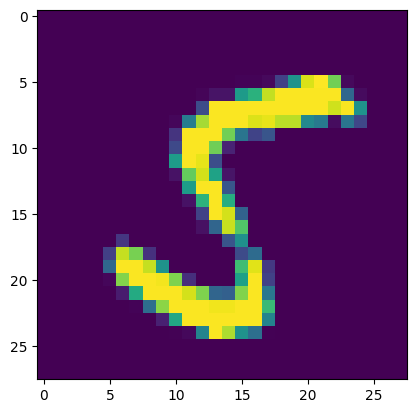

In [37]:
plt.imshow(X_train.iloc[1, :].values.reshape(28, 28)) 
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [40]:
y_pred=knn.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score,f1_score
print(accuracy_score(Y_test,y_pred))

0.9648809523809524


# another way

In [42]:
from  sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_train_data=scaler.fit_transform(X_train)
scaled_test_data=scaler.transform (X_test)

In [78]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)

In [79]:
X_train=pca.fit_transform(scaled_train_data)
X_test=pca.transform(scaled_test_data)

In [80]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [81]:
y_pred=knn.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9391666666666667


In [82]:
# l=[]
# for i in range(1,784,5):
#     pca=PCA(n_components=i)
#     X_train=pca.fit_transform(scaled_train_data)
#     X_test=pca.transform(scaled_test_data)
#     knn=KNeighborsClassifier()
#     knn.fit(X_train,Y_train)
#     y_pred=knn.predict(X_test)
#     print(i,accuracy_score(Y_test,y_pred))
#     l.append([i,accuracy_score(Y_test,y_pred)])

In [83]:
count=0
sum=0
for i in pca.explained_variance_ratio_:
    if sum<0.99:
        sum=sum+i
        count=count+1
    else:
        break    

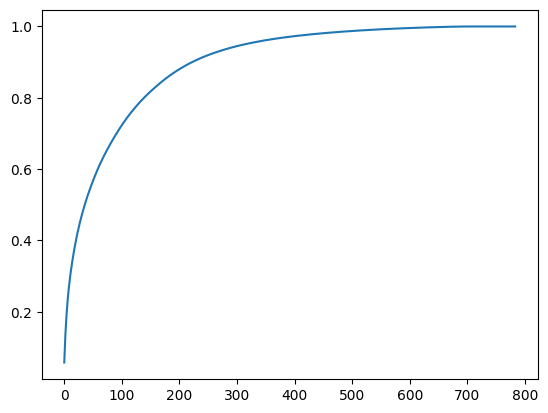

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))